## Data Attributes

|Attribute|Description|
|:---------:|:-----------:|
|popularity|	Each model builds their popularity value slightly differently. For movies: Number of votes for the day, number of views for the day, number of users who marked it as a "favourite" for the day, number of users who added it to their "watchlist" for the day, release date, number of total votes, previous days score |
|budget| The money spend on production process|
|revenue| Earned money from the film|
|original_title| The title of the film|
|director|	The director of the film|
|genres| All genres accepted for the film|
|release_year| The release year of the film|

## Questions related to this data

* Q1: Which movies are the top 5 profitable of all the time?

* Q2: Is there any relationship between the popularity and the budget?

* Q3: Which movie has the highest budget and which one has the lowest?  

* Q4: Which movie genre has the highest production cost? 

* Q5: Which genres are popular?  

* Q6: What is the most frequent genres type?

* Q7: Who is the most frequently filmed Director?

* Q8: What is the relationship between budget, profit, popularity and revenue of films?


# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Gathering Data 

In [2]:
df = pd.read_csv('data/tmdb-movies.csv')

# Assessing Data 

* number of samples in each dataset : *10866*
* number of columns in each dataset : *21*

In [3]:
df.shape

(10866, 21)

* features with missing values : ('imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies')

In [4]:
df.isnull().any() 

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

* duplicate rows : 1

In [6]:
df.duplicated().any()

True

In [7]:
df.duplicated().sum()

1

* number of non-null unique values for features : 

In [8]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

* data types of columns:

In [9]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [11]:
df.original_title

0                      Jurassic World
1                  Mad Max: Fury Road
2                           Insurgent
3        Star Wars: The Force Awakens
4                           Furious 7
                     ...             
10861              The Endless Summer
10862                      Grand Prix
10863             Beregis Avtomobilya
10864          What's Up, Tiger Lily?
10865        Manos: The Hands of Fate
Name: original_title, Length: 10866, dtype: object

> Relase years : 1960-2015 

In [12]:
df.release_year.unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966])

> `profit` is calculated by revenue - budget.

In [13]:
df['profit']= df['revenue'] - df['budget']

In [14]:
df['profit']

0        1363528810
1         228436354
2         185238201
3        1868178225
4        1316249360
            ...    
10861             0
10862             0
10863             0
10864             0
10865        -19000
Name: profit, Length: 10866, dtype: int64

> Checking for the zeros in budget and revenue to prevent inappropriate results. 

In [15]:
df[df['budget']==0].shape[0]

5696

In [16]:
df[df['revenue']==0].shape[0]

6016

In [17]:
df[df['budget']!=0].head() #I will use not 0s.

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


In [18]:
df[df['revenue']!=0].head() #I will use not 0s.

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


# Cleaning Column Labels

I will drop the columns I do not need for this analysis which are: (`imdb_id`, `homepage`, `tagline`, `keywords`, `overview`, `runtime`, `production_companies`, `release_date`, `budget_adj`, `revenue_adj`)

In [19]:
df.drop(['imdb_id','homepage','tagline','keywords','overview','runtime', 'production_companies', 'release_date', 'budget_adj', 'revenue_adj'],axis =1 ,inplace=True)

In [20]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2947,7.3,2015,1316249360


# Data Cleaning

## Replace Zero Values with Null Values for Budget & Revenue

In [21]:
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)

In [22]:
df[df['budget']==0].shape[0] #Checking

0

In [23]:
df[df['revenue']==0].shape[0] #Checking

0

## Drop Nulls

In [24]:
df = df.dropna(subset=['cast', 'director', 'genres', 'budget', 'revenue'])

In [25]:
df.isnull().sum().any()

False

## Drop Duplicates

df = df.drop_duplicates()

In [26]:
df.duplicated().sum().any()

True

# EDA  &  *Answers*

## Q1: Which movies are the top 5 profitable of all the time?

In [27]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'genres', 'vote_count', 'vote_average', 'release_year',
       'profit'],
      dtype='object')

In [28]:
type(df['profit'])

pandas.core.series.Series

In [29]:
df = df.sort_values(by=['profit'], ascending=False)

In [30]:
x = list(df['original_title'].head(10))
y = list(df['profit'].head(10))

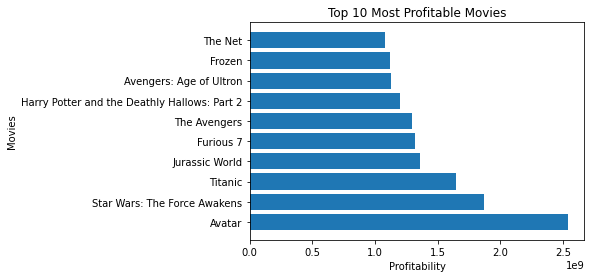

In [31]:
plt.barh(x,y)
plt.title('Top 10 Most Profitable Movies')
plt.ylabel('Movies')
plt.xlabel('Profitability')
plt.show()

## A1: 

`
1 - Avatar
2- Star Wars:The Force Awakens
3- Titanic
4- Jurassic World
5- Furious 7.`

## Q2: Is there any relationship between the popularity and the budget?

### A2: Correlation check.

In [32]:
correlation = df["popularity"].corr(df["budget"])

correlation 

0.4465702124386731

> The correlation between `popularity` and `budget` is 0.4465. It is not close to 1 enough to be in a strong relation. I assume that there is no significant relation between them.

### A2:  Plotting profit vs budget

Text(0.5, 1.0, 'Profit vs Budget for movies')

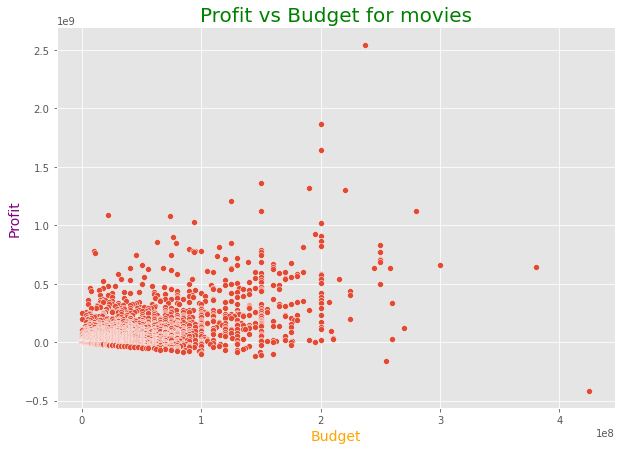

In [33]:
plt.style.use("ggplot")
plt.figure(figsize=[10,7])
sns.scatterplot(data=df,x="budget",y="profit");
plt.xlabel("Budget",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Orange'})
plt.ylabel("Profit",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Purple'})
plt.title("Profit vs Budget for movies",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

> Also, comparison graph cleary shows that there's no relation between the profit and budget.

## Q3: Which movie has the highest budget and which one has the lowest?  

### A3: The movie with the highest budget : 
> Avatar.

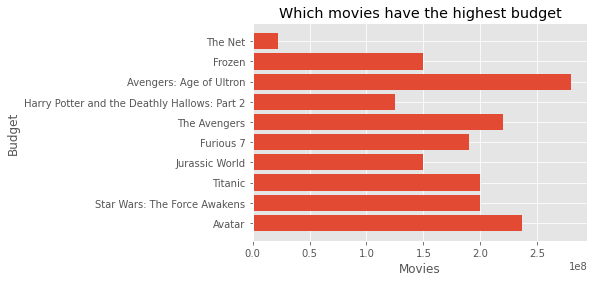

In [34]:
x = list(df['original_title'].head(10))
y = list(df['budget'].head(10))
plt.barh(x,y)
plt.title('Which movies have the highest budget')
plt.ylabel('Budget')
plt.xlabel('Movies')
plt.show()

### A3: The movie with the lowest budget: 
> Charlotte's Web.

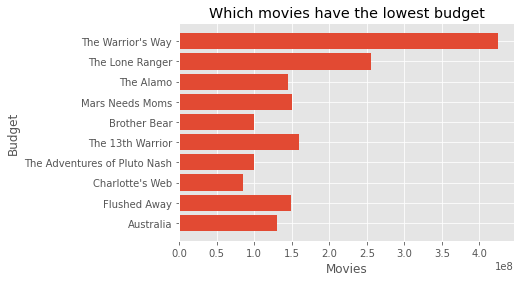

In [35]:
x = list(df['original_title'].tail(10))
y = list(df['budget'].tail(10))
plt.barh(x,y)
plt.title('Which movies have the lowest budget')
plt.ylabel('Budget')
plt.xlabel('Movies')
plt.show()

## A6: Find the most frequent genre over years. 
> Drama.

In [50]:
#from sklearn.feature_extraction.text import CountVectorizer
#temp = df.genres.dropna()
#vec = CountVectorizer(token_pattern='(?u)\\b[\\w-]+\\b', analyzer='word').fit(temp)
#bag_of_genres = vec.transform(temp)
#unique_genres =  vec.get_feature_names()
#np.array(unique_genres)

In [51]:
#genres = pd.DataFrame(bag_of_genres.todense(),columns=unique_genres,index=temp.index)
#sorted_genres_perc = 100*pd.Series(genres.sum()).sort_values(ascending=False)/genres.shape[0]
#plt.figure(figsize=(15,8))
#sns.barplot(x=sorted_genres_perc.values,y=sorted_genres_perc.index,orient="h")
#plt.xlabel("Percentage of Films (%)")
#plt.show()

In [52]:
df

,id,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year,profit
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2009,2544505847
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1868178225
5231,597,4.355219,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Drama|Romance|Thriller,4654,7.3,1997,1645034188
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1363528810
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2947,7.3,2015,1316249360
...,...,...,...,...,...,...,...,...,...,...,...,...
4970,10009,1.653031,100000000.0,2.500000e+02,Brother Bear,Joaquin Phoenix|Jeremy Suarez|Rick Moranis|Joa...,Aaron Blaise|Robert Walker,Animation|Adventure|Family|Fantasy,753,6.8,2003,-99999750
3484,50321,0.921653,150000000.0,3.899276e+07,Mars Needs Moms,Seth Green|Joan Cusack|Dan Fogler|Breckin Meye...,Simon Wells,Adventure|Animation|Family,129,5.5,2011,-111007242
7031,10733,0.948560,145000000.0,2.581996e+07,The Alamo,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,John Lee Hancock,Western|History|War,60,5.9,2004,-119180039
5508,57201,1.214510,255000000.0,8.928991e+07,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,Action|Adventure|Western,1607,6.0,2013,-165710090


In [47]:
top_genres = (df.iloc[:, 8:-5] 
              .sum() 
              .sort_values(ascending=True) 
              .head(-5)
              .index.values 
              )

top6_genres

NameError: name 'top6_genres' is not defined

## A6: The change in popularities of genres over years

In [54]:
genres

,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,...,horror,movie,music,mystery,romance,science,thriller,tv,war,western
1386,1,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
5231,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4970,0,1,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3484,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
5508,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
print(genres.split(' | ',10))

AttributeError: 'DataFrame' object has no attribute 'split'

AttributeError: 'list' object has no attribute 'loc'

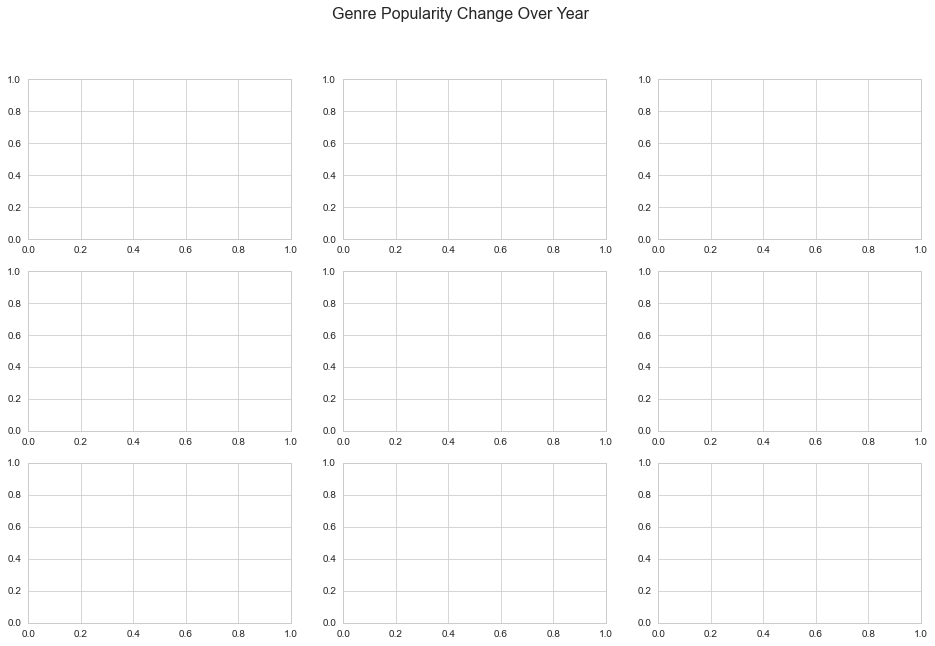

In [44]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(3,3,figsize = (16,10))

fig.suptitle('Genre Popularity Change Over Year',fontsize = 16)
popular_genre = ['Drama','Romance','Adventure','Comedy','Science Fiction']
popular_genre.loc['Drama'].plot(label = "Drama",color = '#f67280',ax = ax[0][0],legend=True)
popular_genre.loc['Romance'].plot(label = "Horror",color='#33FFB5',ax = ax[0][1],legend=True)
popular_genre.loc['Comedy'].plot(label = "Comedy",color='#fe5f55',ax = ax[0][2],legend=True)
popular_genre.loc['Adventure'].plot(label = "Thriller",color='#00818a',ax = ax[1][0],legend=True)
popular_genre.loc['Science Fiction'].plot(label = "Science Fiction",color='#6f6600',ax = ax[1][1],legend=True)

In [ ]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(3,3,figsize = (16,10))

fig.suptitle('Genre Popularity Change Over Year',fontsize = 16)

popular_genre.loc['Drama'].plot(label = "Drama",color = '#f67280',ax = ax[0][0],legend=True)
popular_genre.loc['Action'].plot(label = "Horror",color='#33FFB5',ax = ax[0][1],legend=True)
popular_genre.loc['Comedy'].plot(label = "Comedy",color='#fe5f55',ax = ax[0][2],legend=True)
popular_genre.loc['Thriller'].plot(label = "Thriller",color='#00818a',ax = ax[1][0],legend=True)
popular_genre.loc['Science Fiction'].plot(label = "Science Fiction",color='#6f6600',ax = ax[1][1],legend=True)
popular_genre.loc['Romance'].plot(label = "Romance",color='#1a2c5b',ax = ax[1][2],legend=True)
popular_genre.loc['Music'].plot(label = "Music",color='#db3b61',ax = ax[2][0],legend=True)
popular_genre.loc['Adventure'].plot(label = "Adventure",color='#08c299',ax = ax[2][1],legend=True)
popular_genre.loc['Crime'].plot(label = "Crime",color='c',ax = ax[2][2],legend=True)

# Q8: What is the relationship between budget, profit, popularity and revenue of films?

## A8: 	Interpreting by graph

In [ ]:
fig, axes = plt.subplots(2,2,figsize = (16,6))
fig.suptitle("Comparisons",fontsize=14)
sns.regplot(x=df['popularity'], y=df['budget'],color='c',ax=axes[0][0])
sns.regplot(x=df['popularity'], y=df['revenue'],color='c',ax=axes[0][1])
sns.regplot(x=df['popularity'], y=df['profit'],color='c',ax=axes[1][0])
sns.regplot(x=df['budget'], y=df['revenue'],color='c',ax=axes[1][1])
sns.set_style("whitegrid")

## A8: Comment on correlation results

In [ ]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })
plot_correlation_map(df[['popularity','budget','revenue','profit']])

The ones there is a relation between: 
* Revenue & Popularity
* Profit & Popularity
* Revenue & Budget
* Revenue & Profit

All of them was expected.

The ones there is no significant relation between: 
* Budget & Popularity
* Budget & Profit